In [1]:
import numpy as np
from utils.plotSettings import *


<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Change in RPE')

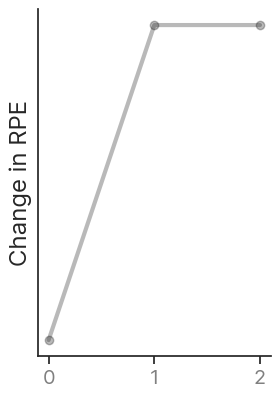

In [3]:
plt.figure(figsize = (3, 4.5))
ax = plt.subplot(111)
# ax.plot(np.arange(3), [1, 0.4, 0], color = 'r', marker = 'o', lw = 3)
ax.plot(np.arange(3), [-1, 0, 0], color = 'k', marker = 'o', lw = 3, alpha = 0.3)

ax.set_yticks(ticks=[])
ax.set_ylabel(r'Change in RPE')
# ax.set_

In [2]:
# mat1 = np.random.randint(16, 20, size = (11,11))/360
# mat2 = np.random.randint(25, 28, size = (11,11))/700
mat1 = np.random.randint(-2, 2, size = (11,11))
mat2 = np.random.randint(-1, 1, size = (11,11))

np.fill_diagonal(np.fliplr(mat1), 2)
np.fill_diagonal(np.fliplr(mat2), 2)
vmin = -0.2
vmax = 0.2

# cmap = 'crest'
# cmap = sns.cubehelix_palette(start=9, as_cmap = True, dark = 0.05, light = 0.0)
# cmap = sns.light_palette("#79C", as_cmap = True)
# cmap = sns.color_palette("dark:#5A9", as_cmap=True)
# cmap = sns.color_palette("blend:#f57e7e,#ffffff,#7fc3c0", as_cmap=True)
# cmap = sns.diverging_palette(h_neg = 200, h_pos = 352, as_cmap = True, l=70, sep = 2, s = 80)
cmap = sns.diverging_palette(h_neg = 255, h_pos = 15, as_cmap = True, l = 50, sep = 1, s = 100)


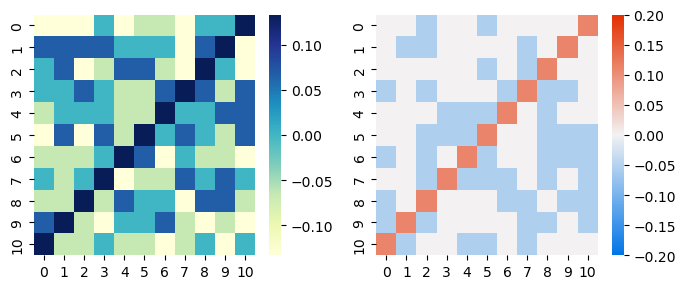

In [7]:
fig = plt.figure(figsize = (7, 3))
ax = plt.subplot(121)
sns.heatmap(mat1/15, vmin = np.min(mat1/15), vmax = np.max(mat1/15), ax = ax, cmap = 'YlGnBu')
ax = plt.subplot(122)
sns.heatmap(mat2/18, vmin = vmin, vmax = vmax, ax = ax, cmap = cmap, center = 0)
plt.tight_layout()

173.7916 166.0


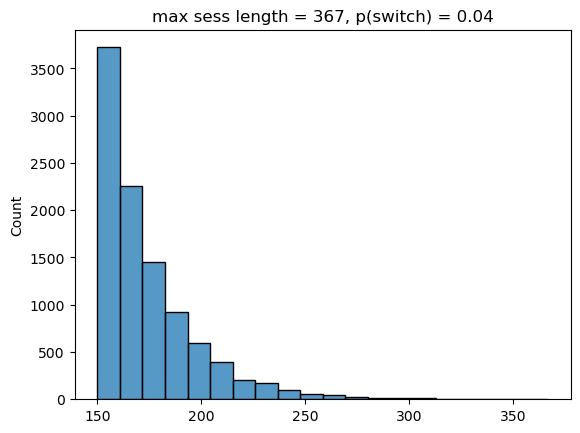

In [8]:
prob_switch = 1/25
l = []
for i in range(10000):
    sesslen = 150
    for j in range(1000):
        if np.random.random() < prob_switch: break #end session
        else: sesslen += 1
    l.append(sesslen)
sns.histplot(l, bins = 20, stat = 'count')#, discrete = True)
plt.title(f'max sess length = {max(l)}, p(switch) = {round(prob_switch,3)}')
print(np.mean(l), np.median(l))
# plt.xlim(0, max(l))

In [9]:
%matplotlib qt

from matplotlib.animation import FuncAnimation
def fxn(mean, arms, permute = False):
    x = np.linspace(1, arms, arms)
    sig = 1.75/2      #1.75/2 for 4 armed
    amp = 0.7
    vo = 0.1
    gx = (amp*np.exp(-0.5*((x-mean)**2)/(sig**2)))+vo
    if permute:
        gx = np.random.permutation(gx)
    return gx
np.random.seed(23)
x = []
for _ in range(10):
    r = np.random.randint(1,5)
    x.append(fxn(r, 4, True)*100)

for _ in range(10):
    r = np.random.randint(1,5)
    x.append(fxn(r, 4, False)*100)

for _ in range(10):
    r = np.random.randint(1,5)
    x.append(fxn(r, 4, True)*100)

y = [1, 2, 3, 4]
struc = [[80, 46, 15, 10], [46, 80, 46, 15], [15, 46, 80, 46], [10, 15, 46, 80]]
size_scale = 2

fig = plt.figure(figsize = (4, 9))

# plot here
for ind, i in enumerate(x):
    flag = [1 for j in struc if list(np.array(i, dtype = int))==j]
    if (ind>9) & (ind<20):
        plt.scatter(y, np.ones(len(i))*(ind+1), s = i*size_scale, c = 'xkcd:emerald green', edgecolor = 'face')
    elif (ind<10) | (ind>19):
        plt.scatter(y, np.ones(len(i))*(ind+1), s = i*size_scale, c = 'xkcd:pumpkin orange', edgecolor = 'face')
        if 1 in flag:
            plt.scatter(y, np.ones(len(i))*(ind+1), s = i*size_scale, c = 'xkcd:olive', edgecolor = 'face')


plt.axhline(10.5, color = 'grey', linewidth = 0.5)
plt.axhline(20.5, color = 'grey', linewidth = 0.5)
plt.xticks([1,2,3,4])
plt.yticks([])
sns.despine(trim = True, left = True)
plt.tight_layout()

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
ls = 2
N = 4
alpha = 1
kernel = RBF(length_scale=ls)  
gp = GaussianProcessRegressor(kernel=kernel, alpha=alpha, optimizer=None)
X = np.linspace(1,N,N).reshape(N,1)
T = 100
# print(X)
a = np.array([3., 4., 4., 3., 3., 3., 3., 3., 3., 2., 2., 1., 3., 4., 4., 4., 4.,
       3., 3., 2., 1., 1., 4., 4., 4., 2., 3., 2., 2., 1., 1., 3., 2., 2.,
       3., 3., 2., 2., 2., 2., 3., 1., 2., 1., 4., 4., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4.], dtype= int)-1
r = np.array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])
# m = np.zeros((T,N))
# sd = np.zeros((T,N))+np.sqrt(alpha)
t = 15
for i in range(1, t+1):
    print(X[a[:i]][-1], i)
    gp.fit(X[a[:i]], r[:i])
    m, sd = gp.predict(X, return_std=True)
    print(m, sd)
    v = m + beta*sd
    print(v)
    print(np.random.choice((np.where(v == np.amax(v))[0]))+1)

[3.] 1
[0. 0. 0. 0.] [0.90336055 0.78140873 0.70710678 0.78140873]


NameError: name 'beta' is not defined